## Propriedades da solução da equação de onda


\begin{equation*} \frac{\partial^2 u}{\partial t^2} =
c^2 \frac{\partial^2 u}{\partial x^2}
\end{equation*}

Soluções:
$$u(x,t)=g_D(x−ct)+g_E(x+ct)$$

Com $u(x,0)=I(x)$ e $u_t(x,0)=0:$
$$u(x,t)=\frac{1}{2}I(x−ct)+\frac{1}{2}I(x+ct),$$

ou seja, duas ondas, uma a viajar para a direita, outra para a esquerda.

Sabemos que ondas planas, da forma $ e^{ikx} = \cos kx + i\sin kx$, são solução da equação de onda (mais exactamente, são funções próprias do operador $\frac{\partial^2 }{\partial x^2}$). Vamos então representar $I(x)$ como uma sobreposição de ondas planas:
$$ I(x) \approx \sum_{k\in K} b_k e^{ikx} .$$  

Precisamos determinar os pesos, $b_k$, que poderiam ser obtidos por ajuste (mínimos quadrados, p.ex.). Mas sabemos que são as componentes de uma série de Fourier! O conjunto de valores de $k$ (que é a frequência espacial, ou vector de onda, e $\lambda = 2\pi/k$ é o respectivo comprimento de onda) é infinito, mas na práctica teremos que o truncar para o reduzir a um conjunto finito, $K$.

Uma vez que $u(x,t)=\frac{1}{2} I(x-ct) + \frac{1}{2} I(x+ct)$, a solução exacta é:
$$ u(x,t) = \frac{1}{2} \sum_{k\in K} b_k e^{ik(x - ct)}
+ \frac{1}{2} \sum_{k\in K} b_k e^{ik(x + ct)} .$$  

Como  a equação é linear centremo-nos no estudo de uma única componente, $e^{i(kx -\omega t)}$, onde $\omega = ck$.


### Aplicação ao esquema de discretização

Vejamos como se comporta a solução discreta análoga, $u^n_q = e^{i(kx_q - \tilde\omega t_n)}$, para a equação discretizada:
$$ \left[ \delta^2_t u = c^2 \delta^2_x u \right]^n_q.
$$

A frequência numérica $\tilde\omega$ poderá ser diferente da analítica, $\omega$, e a amplitude $u^n_q$ poderá diferir da exacta, $u$.

Substituindo a onda plana discreta nos operadores temos:

$$[\delta^2_t e^{i\omega t}]^n = -\frac{4}{\Delta t^2}\sin^2\left(
\frac{\omega\Delta t}{2}\right)e^{i\omega n\Delta t},
$$

e para o operador no espaço basta trocar $\omega \rightarrow k$, $t \rightarrow x$, $n \rightarrow q$:

$$[\delta^2_x e^{ik x}]_q = -\frac{4}{\Delta x^2}\sin^2\left(
\frac{k\Delta x}{2}\right)e^{ik q\Delta x}.
$$   

Então inserindo uma onda plana $u=e^{i(kx_q-\tilde\omega t_n)}$ no esquema discretizado leva a uma equação que pode ser resolvida em ordem a $\tilde \omega$:

$$
\sin^2\left(\frac{\tilde\omega\Delta t}{2}\right)
= C^2\sin^2\left(\frac{k\Delta x}{2}\right),\quad C = \frac{c\Delta t}{\Delta x}
\mbox{  (número de Courant)}.
$$

ou

$$
\tag{1}
\tilde\omega = \frac{2}{\Delta t}
\sin^{-1}\left( C\sin\left(\frac{k\Delta x}{2}\right)\right),
$$

que é a relação de dispersão numérica. Decorre daqui que a onda $u=e^{i(kx_q-\tilde\omega t_n)}$ viaja à velocidade (numérica) $\tilde c =\tilde\omega /k$. Para avaliar a fidelidade do esquema discreto, podemos comparar $\tilde c$ com $c$.
Definindo $p=k\Delta x/2$ (adimensional), que representa o número de pontos da grelha espacial por comprimento de onda espacial, o racio de velocidades pode ser escrito como:

$$
r(C, p) = \frac{\tilde c}{c} =
\frac{2}{kc\Delta t} \sin^{-1}(C\sin p) =
\frac{2}{kC\Delta x} \sin^{-1}(C\sin p) =
\frac{1}{Cp}{\sin}^{-1}\left(C\sin p\right).
$$

Note-se que o menor comprimento de onda que podemos definir é $\lambda = 2\Delta x$, que corresponde ao vector de onda $k=\pi/\Delta x$, e a um $p=\pi/2$. Assim $p=k\Delta x/2 = \pi/2\ \Rightarrow\, p\in [0,\pi/2]$. Podemos então fazer o gráfico de $r(C,p)$ nos intervalos $p\in [0,\pi/2]$, $C\in [-1,1].$


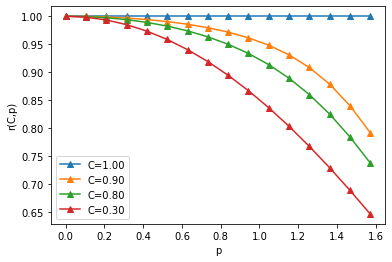

In [3]:
import numpy as np
import pylab as plt
%matplotlib inline

def r(C, p):
    return 1/(C*p)*np.arcsin(C*np.sin(p))
Cs = [1., 0.9, 0.8, 0.3]
ps = np.linspace(0.001,np.pi/2,16)
for v in Cs:
    plt.plot(ps, r(v,ps),'^-',label='C={:.2f}'.format(v))
plt.xlabel('p')
plt.ylabel('r(C,p)')
plt.legend()
plt.show()

Para $p$ pequeno, podemos expandir $\tilde \omega$ em série de Taylor:
$$
\frac{1}{6}\left(\frac{k\Delta x}{2}\right)^2(C^2-1)
= \frac{k^2}{24}\left( c^2\Delta t^2 - \Delta x^2\right) =
\mathcal{O}(\Delta t^2, \Delta x^2)
$$

### Estabilidade

O "verdadeiro" $\omega$ é real. Por seu lado o numérico $\tilde \omega$ pode ser complexo. Se assim fôr, levará a um crescimento exponencial da amplitude!  Então exigir um $\tilde \omega$ real garante-nos a estabilidade. Usando a expressão encontrada acima:
$$
\sin^2\left(\frac{\tilde\omega\Delta t}{2}\right)
= C^2\sin^2\left(\frac{k\Delta x}{2}\right),
$$

vemos que isso exige que o lado direito da equação seja limitado ao intervalo $ [-1,1]$. Mas isso exige que $ C \le 1$. O critério de estabilidade é então:
$$
C = \frac{c\Delta t}{\Delta x} \leq 1.
$$

No caso de $C>1$ aparecem ondas não-físicas. Isso deve-se a, se $C>1$,
$$
\underbrace{\sin\left(\frac{\tilde\omega\Delta t}{2}\right)}_{>1} = C\sin\left(\frac{k\Delta x}{2}\right)
$$

o que obriga a que $\tilde \omega$ seja complexo ($\sin(i\theta)=\sinh(\theta)$, que cresce com $\theta$). Escrevendo $\tilde\omega = \tilde\omega_r \pm i\tilde\omega_i$,
quando um $\tilde\omega_i<0 $ vem $\exp(i\cdot i\tilde\omega_i) =
   \exp (-\tilde\omega_i)$, que corresponde a crescimento exponencial! Ao fim de algum tempo, esta componente dominará a solução, conduzindo a um aumento global exponencial da amplitude (o que não é um comportamento físico).
   
## Dimensões espaciais superiores (2D, 3D)

A equação de onda discretizada em duas dimensões espaciais é expressa por:  
$$
\lbrack \delta^2_t u = c^2(\delta^2_x u + \delta^2_y u)\rbrack^n_{q,r} .
$$  

Testando uma solução discreta em onda plana da forma $ u^n_{q,r} = e^{i(k_x\, q\Delta x + k_y\, r\Delta y -
\tilde\omega\  n\Delta t)}$ leva-nos à relação de dispersão numérica:
$$
\sin^2\left(\frac{\tilde\omega\Delta t}{2}\right)
= C_x^2\sin^2 p_x
+ C_y^2\sin^2 p_y,
$$  
em que 
$$
C_x = \frac{c\Delta t}{\Delta x},\quad
C_y = \frac{c\Delta t}{\Delta y}, \quad
p_x = \frac{k_x\Delta x}{2},\quad
p_y = \frac{k_y\Delta y}{2}.
$$

Garantir que $\tilde \omega$ é real exige que $C_x^2 + C_y^2 \leq 1$ ou:
$$
\Delta t \leq \frac{1}{c} \left( \frac{1}{\Delta x^2} +
\frac{1}{\Delta y^2}\right)^{-\frac{1}{2}}.
$$

De um modo análogo, em 3D obtemos:
$$
\Delta t \leq \frac{1}{c}\left( \frac{1}{\Delta x^2} +
\frac{1}{\Delta y^2} + \frac{1}{\Delta z^2}\right)^{-\frac{1}{2}}.
$$

A relação de dispersão em 2D vem então:
$$
\tilde\omega = \frac{2}{\Delta t}\sin^{-1}\left(
\left( C_x^2\sin^2 p_x + C_y^2\sin^ p_y\right)^{\frac{1}{2}}\right)
.$$

Podemos usar coordenadas polares (o módulo de $k$ e o ângulo $\theta$ que faz com o eixo dos $k_x$):
$$
k_x = k\sin\theta,\quad k_y=k\cos\theta,
\quad p_x=\frac{1}{2} kh\cos\theta,\quad p_y=\frac{1}{2} kh\sin\theta,
$$

o que nos permite escrever o quociente das velocidades numérica e real como:
$$
\frac{\tilde c}{c} = \frac{1}{Ckh}
\sin^{-1}\left(C\left(\sin^2 ({\frac{1}{2}}kh\cos\theta)
+ \sin^2({\frac{1}{2}}kh\sin\theta) \right)^{\frac{1}{2}}\right).
$$

#### Relação de dispersão numérica

Recordemos a equação (1)
$$
\tag{1}
\tilde\omega = \frac{2}{\Delta t}
\sin^{-1}\left( C\sin\left(\frac{k\Delta x}{2}\right)\right).
$$

Esta relação chama-se relação de dispersão numérica, e relaciona a frequência numérica com os parâmetros relevantes do problema. A relação de dispersão analítica é $\omega = ck$. A velocidade de fase analítica é então $c=\omega/k$, o que reflecte o facto de a propagação se fazer sem dispersão. No entanto isso não acontece no caso numérico, já que temos uma dependência da velocidade da onda em $k$!



O caso $C=1$ é especial, já que a equação anterior se reduz a 

$$ \frac{2}{\Delta t}\frac{k\Delta x}{2} = \frac{1}{\Delta t}
\frac{\omega\Delta x}{c} = \frac{\omega}{C} = \omega.
$$


Assim, $\tilde\omega=\omega$, e a solução numérica é exacta em todos os pontos da grelha, quaisquer que sejam $\Delta t$ e $\Delta x$! A solução numérica é também a solução analítica nos pontos da grelha.

Quando $C \neq 1$ podemos estudar o erro na dispersão numérica através do desvio $\tilde\omega - \omega$, ou $\tilde\omega/\omega$, ou equivalentemente $\tilde c- c$, ou $\tilde c/c$ (onde $c=\omega/k$ e $\tilde c = \tilde\omega/k$). A mais simples é:

$$\frac{\tilde c}{c} = \frac{1}{Cp}{\sin}^{-1}\left(C\sin p\right),
$$

que depende apenas de $C$ e do parâmetro adimensional $p=k\Delta x/2$, que nos diz quantos pontos da grelha temos por comprimento de onda para a componente $k$. Ou seja, $p$ mede quão bem a variação espacial da component $k$ da onda é resolvida na grelha. (Ondas com comprimentos de onda inferiores a $2\Delta x$ ($2\pi/k<2\Delta x$) não são visíveis na grelha (Nyquist de novo!), logo não faz sentido ter $p>\pi/2$).

Definimos então a função $r(C,p)=\tilde c/c$, e estudamos o seu comportamento nos intervalos $C\in(0,1]$ , $p\in(0,\pi/2]$.

Ref: _Finite Difference Computing of PDEs_, H.P. Langtangen e S. Linge, Springer (2017)